In [1452]:
import pandas as pd
data = pd.read_csv('../data/Students_Mental_Health.csv')

data.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [1453]:
len(data)

7022

In [1454]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [1455]:
data.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,7022.000000,7010.00000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,23.003418,3.49127,2.427941,2.254486,2.300484,2.453005,22.010538
std,3.853978,0.28742,1.638408,1.625193,1.624305,1.708995,4.358380
min,18.000000,2.44000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,3.29000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,22.000000,3.50000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,25.000000,3.70000,4.000000,3.000000,4.000000,4.000000,26.000000
max,35.000000,4.00000,5.000000,5.000000,5.000000,5.000000,29.000000


In [1456]:
data.dropna(axis=0, inplace=True)

In [1457]:
len(data)

6995

In [1458]:
data["Depression_Score"].value_counts(normalize=True)

Depression_Score
3    0.197999
1    0.186276
2    0.185847
0    0.184132
4    0.125518
5    0.120229
Name: proportion, dtype: float64

In [1459]:
data = data.drop(["Anxiety_Score"], axis=1).reset_index()

In [1460]:
# Vamos a user OneHOtEncoder para transformar los valores de la columna 'Gender':
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
enc = OneHotEncoder(sparse_output=False)
gender = enc.fit_transform(data[["Gender"]])


In [1461]:
enc.categories_

[array(['Female', 'Male'], dtype=object)]

In [1462]:
data = pd.merge(data, pd.DataFrame(gender, columns=["Male", "Female"]), left_index=True, right_index=True)

In [1463]:
data.head()

,index,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,...,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Male,Female
0,0,25,Others,Male,3.56,3,3,Good,Moderate,Good,...,Never,Never,No,No,2,Moderate,17,On-Campus,0.0,1.0
1,1,24,Engineering,Female,2.44,0,3,Average,Low,Average,...,Occasionally,Occasionally,No,No,3,Low,27,On-Campus,1.0,0.0
2,2,19,Business,Female,3.74,4,0,Good,Low,Average,...,Never,Occasionally,No,No,4,High,15,On-Campus,1.0,0.0
3,4,18,Business,Male,3.40,3,3,Good,Low,Average,...,Never,Never,No,Yes,0,High,23,On-Campus,0.0,1.0
4,5,21,Medical,Female,3.35,2,4,Good,Moderate,Good,...,Never,Never,No,No,5,Moderate,19,Off-Campus,1.0,0.0


In [1464]:
data.drop(columns={"Gender", "Male"}, inplace=True)

In [1465]:
data = data.rename(columns = {'Female': "Gender"})

In [1466]:
data.head()

,index,Age,Course,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender
0,0,25,Others,3.56,3,3,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus,1.0
1,1,24,Engineering,2.44,0,3,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus,0.0
2,2,19,Business,3.74,4,0,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus,0.0
3,4,18,Business,3.40,3,3,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus,1.0
4,5,21,Medical,3.35,2,4,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus,0.0


In [1467]:
data["Residence_Type"].unique()

array(['On-Campus', 'Off-Campus', 'With Family'], dtype=object)

In [1468]:
label_cols = ["Family_History", "Chronic_Illness"]
onehot_cols = ["Course"]
standard_cols = ["Age", "CGPA", "Semester_Credit_Load"]
apply_cols = ["Sleep_Quality", "Physical_Activity", "Diet_Quality", "Social_Support", "Relationship_Status", "Substance_Use", "Counseling_Service_Use", "Extracurricular_Involvement", "Residence_Type"]

In [1469]:
def transform_columns():
   new_values = {}
   for col in apply_cols:
      if "Moderate" in data[col].unique():
         new_values = { "Low": 0, "Moderate": 1, "High": 2}
      if "Never" in data[col].unique():
         new_values = { "Never": 0, "Occasionally": 1, "Frequently": 2}
      if "Good" in data[col].unique():
         new_values = { "Good": 0, "Average": 1, "Poor": 2}
      if "Single" in data[col].unique():
         new_values = { "Single": 0, "In a Relationship": 1.5, "Married": 2}
      if "On-Campus" in data[col].unique():
         new_values = { "On-Campus": 0, "Off-Campus": 1, "With Family": 2}
   
      data[col] = data[col].apply(lambda x: new_values[x])
   
   for col in label_cols:
      label = LabelEncoder()
      data[col] = label.fit_transform(data[[col]])

   ohe = OneHotEncoder(sparse_output=False)
   ohe_processed = ohe.fit_transform(data[["Course"]])
   courses = pd.DataFrame(ohe_processed)
   courses.columns = list(ohe.categories_[0])
   return pd.merge(data, courses, left_index=True, right_index=True)
      

   

In [1470]:
data.head()

,index,Age,Course,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender
0,0,25,Others,3.56,3,3,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus,1.0
1,1,24,Engineering,2.44,0,3,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus,0.0
2,2,19,Business,3.74,4,0,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus,0.0
3,4,18,Business,3.40,3,3,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus,1.0
4,5,21,Medical,3.35,2,4,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus,0.0


In [1471]:
data = transform_columns()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1472]:
data = data.drop(columns=["Course", "index"], axis=1)

In [1473]:
data.head()

,Age,CGPA,Stress_Level,Depression_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,...,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Gender,Business,Computer Science,Engineering,Law,Medical,Others
0,25,3.56,3,3,0,1,0,1,2.0,0,...,1,17,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,24,2.44,0,3,1,0,1,0,0.0,1,...,0,27,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,19,3.74,4,0,0,0,1,1,1.5,0,...,2,15,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,18,3.40,3,3,0,0,1,2,2.0,0,...,2,23,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,21,3.35,2,4,0,1,0,2,0.0,0,...,1,19,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1474]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import make_pipeline

# ohe_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))


# full_pipeline = ColumnTransformer(
#     transformers=[
#         ("one", ohe_pipeline, onehot_cols),
#         ("label", LabelEncoder(), ['Family_History']),
#     ],
#     remainder='passthrough'
# )

# full_pipeline.fit(data)

In [1475]:
# Vamos a probar a hacer el split en train y test de forma aleatoria, con un 20% de valores en test y un 80% en train:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["Depression_Score"]), data["Depression_Score"], test_size=0.2, random_state=1743)

In [1476]:
# Comprobamos si nos ha salido equilibrado:
y_train.value_counts(normalize=True)

Depression_Score
3    0.196569
1    0.191744
2    0.183167
0    0.182988
4    0.123660
5    0.121873
Name: proportion, dtype: float64

In [1477]:
y_test.value_counts(normalize=True)

Depression_Score
3    0.203717
2    0.196569
0    0.188706
1    0.164403
4    0.132952
5    0.113653
Name: proportion, dtype: float64

In [1478]:
# No nos ha salido muy equilibrado para el valor de 1, asi que vamos a hacer el stratified shuffle split:
from sklearn.model_selection import StratifiedShuffleSplit
X = data.drop(columns=["Depression_Score"])
y = data["Depression_Score"]
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1743)
for train_index, test_index in split.split(X, y):
    train_set = X.iloc[train_index]
    train_y_set = y.iloc[train_index]
    test_set = X.iloc[test_index]
    test_y_set = y.iloc[test_index]

In [1479]:
train_y_set.value_counts(normalize=True)

Depression_Score
3    0.197999
1    0.186204
2    0.185847
0    0.184239
4    0.125447
5    0.120264
Name: proportion, dtype: float64

In [1480]:
test_y_set.value_counts(normalize=True)

Depression_Score
3    0.197999
1    0.186562
2    0.185847
0    0.183703
4    0.125804
5    0.120086
Name: proportion, dtype: float64

In [1481]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
from pathlib import Path
# Creamos el directorio:
IMAGES_PATH = Path() / "images" / "regression_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [1482]:
from sklearn.tree import DecisionTreeClassifier
tree_cls = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1808)
tree_cls.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1808)

In [1483]:
clases = list(range(3,9))
clases = [str(x) for x in clases]

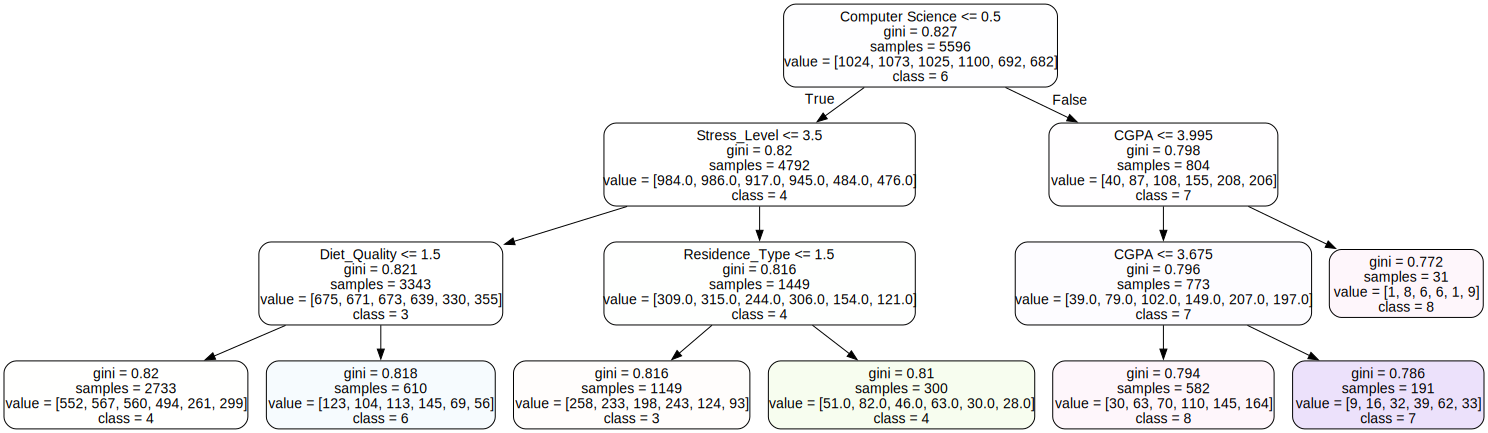

In [1484]:
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
    tree_cls,
    out_file=str(IMAGES_PATH / "clasificacion_tree.dot"),
    feature_names=train_set.columns,
    class_names=clases,
    rounded=True,
    filled=True
)
Source.from_file(IMAGES_PATH / "clasificacion_tree.dot")

In [1485]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report
accuracy_score(train_y_set, tree_cls.predict(train_set))

0.2253395282344532

In [1486]:
multilabel_confusion_matrix(train_y_set, tree_cls.predict(train_set))

array([[[3680,  885],
        [ 772,  259]],

       [[2146, 2408],
        [ 421,  621]],

       [[4556,    0],
        [1040,    0]],

       [[4014,  474],
        [ 961,  147]],

       [[4762,  132],
        [ 642,   60]],

       [[4487,  436],
        [ 499,  174]]])

In [1487]:
classification_report(train_y_set, tree_cls.predict(train_set),target_names=clases, output_dict=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

{'3': {'precision': 0.2263986013986014,
  'recall': 0.25121241513094084,
  'f1-score': 0.2381609195402299,
  'support': 1031.0},
 '4': {'precision': 0.20501815780785737,
  'recall': 0.5959692898272553,
  'f1-score': 0.3050847457627119,
  'support': 1042.0},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1040.0},
 '6': {'precision': 0.23671497584541062,
  'recall': 0.13267148014440433,
  'f1-score': 0.1700404858299595,
  'support': 1108.0},
 '7': {'precision': 0.3125,
  'recall': 0.08547008547008547,
  'f1-score': 0.1342281879194631,
  'support': 702.0},
 '8': {'precision': 0.28524590163934427,
  'recall': 0.2585438335809807,
  'f1-score': 0.2712392829306313,
  'support': 673.0},
 'accuracy': 0.2253395282344532,
 'macro avg': {'precision': 0.21097960611520228,
  'recall': 0.22064451735894441,
  'f1-score': 0.18645893699716598,
  'support': 5596.0},
 'weighted avg': {'precision': 0.2002629670331914,
  'recall': 0.2253395282344532,
  'f1-score': 0.18381331250216154,
 

In [1488]:
from sklearn.ensemble import RandomForestClassifier
rnd_frt = RandomForestClassifier(n_estimators=5000, max_depth=3, min_samples_leaf=30, random_state=1808)

In [1489]:
rnd_frt.fit(train_set, train_y_set)

RandomForestClassifier(max_depth=3, min_samples_leaf=30, n_estimators=5000,
                       random_state=1808)

In [1490]:
accuracy_score(train_y_set, rnd_frt.predict(train_set))

0.28037884203002145

In [1491]:
rnd_frt.feature_importances_

array([0.05307217, 0.07101021, 0.04786958, 0.01456569, 0.01953661,
       0.02183895, 0.03297976, 0.02856685, 0.01731875, 0.01676294,
       0.00990639, 0.00494773, 0.03535419, 0.01680914, 0.04570364,
       0.01454763, 0.00762673, 0.00905745, 0.3908    , 0.02542084,
       0.0187265 , 0.07652   , 0.02105824])

In [1492]:
rnd_frt.feature_names_in_

array(['Age', 'CGPA', 'Stress_Level', 'Sleep_Quality',
       'Physical_Activity', 'Diet_Quality', 'Social_Support',
       'Relationship_Status', 'Substance_Use', 'Counseling_Service_Use',
       'Family_History', 'Chronic_Illness', 'Financial_Stress',
       'Extracurricular_Involvement', 'Semester_Credit_Load',
       'Residence_Type', 'Gender', 'Business', 'Computer Science',
       'Engineering', 'Law', 'Medical', 'Others'], dtype=object)

In [1493]:
from sklearn.ensemble import RandomForestClassifier
rnd_frt_2 = RandomForestClassifier(n_estimators=5000, max_depth=3, min_samples_leaf=30, max_features=4, random_state=1808)
rnd_frt_2.fit(train_set, train_y_set)

RandomForestClassifier(max_depth=3, max_features=4, min_samples_leaf=30,
                       n_estimators=5000, random_state=1808)

In [1494]:
accuracy_score(train_y_set, rnd_frt_2.predict(train_set))

0.28037884203002145

In [1495]:
rnd_frt_2.feature_importances_

array([0.05307217, 0.07101021, 0.04786958, 0.01456569, 0.01953661,
       0.02183895, 0.03297976, 0.02856685, 0.01731875, 0.01676294,
       0.00990639, 0.00494773, 0.03535419, 0.01680914, 0.04570364,
       0.01454763, 0.00762673, 0.00905745, 0.3908    , 0.02542084,
       0.0187265 , 0.07652   , 0.02105824])

In [1496]:
from sklearn.ensemble import ExtraTreesClassifier
ext_frt = ExtraTreesClassifier(n_estimators=5000, min_samples_leaf=30, max_features=4, random_state=1808)
ext_frt.fit(train_set, train_y_set)

ExtraTreesClassifier(max_features=4, min_samples_leaf=30, n_estimators=5000,
                     random_state=1808)

In [1497]:
accuracy_score(train_y_set, ext_frt.predict(train_set))

0.48034310221586846

In [1498]:
accuracy_score(test_y_set, ext_frt.predict(test_set))

0.2015725518227305

In [1499]:
accuracy_score(test_y_set, rnd_frt.predict(test_set))

0.21515368120085776

In [1500]:
accuracy_score(test_y_set, rnd_frt_2.predict(test_set))

0.21515368120085776

In [1501]:
accuracy_score(test_y_set, tree_cls.predict(test_set))

0.22087205146533237

In [1502]:
from sklearn.ensemble import ExtraTreesClassifier
ext_frt_2 = ExtraTreesClassifier(n_estimators=5000, min_samples_leaf=30, max_features=4, random_state=1808, bootstrap=True)
ext_frt_2.fit(train_set, train_y_set)

ExtraTreesClassifier(bootstrap=True, max_features=4, min_samples_leaf=30,
                     n_estimators=5000, random_state=1808)

In [1503]:
accuracy_score(test_y_set, ext_frt_2.predict(test_set))

0.20729092208720515

In [1504]:
136/len(test_y_set) # Accuracy del que partiamos en el test

0.09721229449606862

In [1505]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=30, random_state=1808), learning_rate=0.05, n_estimators=5000, random_state=1808)
ada.fit(train_set, train_y_set)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=30,
                                                    random_state=1808),
                   learning_rate=0.05, n_estimators=5000, random_state=1808)

In [1506]:
accuracy_score(train_y_set, ada.predict(train_set))

0.947819871336669

In [1508]:
accuracy_score(test_y_set, ada.predict(test_set))

0.19156540385989992

In [1507]:
accuracy_score(train_y_set, rnd_frt.predict(train_set))

0.28037884203002145

In [1509]:
# Vamos a probar distintos valores para los hiperparametros:
from sklearn.model_selection import RandomizedSearchCV
params = {
  "learning_rate": [0.05*x for x in range(1, 21)],
  "n_estimators": range(1000, 1001, 1000),
  "estimator__max_depth": range(2, 13),
  "estimator__max_features": [3, 4, 5],
  "estimator__min_samples_leaf": [1, 5, 20, 30, 50]
}

In [1510]:
rnd_grid = RandomizedSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=1808), random_state=1808), param_distributions=params, n_iter=5, cv=5)

In [1511]:
rnd_grid.fit(train_set, train_y_set)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1808),
                                                random_state=1808),
                   n_iter=5,
                   param_distributions={'estimator__max_depth': range(2, 13),
                                        'estimator__max_features': [3, 4, 5],
                                        'estimator__min_samples_leaf': [1, 5,
                                                                        20, 30,
                                                                        50],
                                        'learning_rate': [0.05, 0.1,
                                                          0.15000000000000002,
                                                          0.2, 0.25,
                                                          0.30000000000000004,
                                                          0.35000000000000003,
                                                          0.4, 0.45, 0.5, 0.55,
                                                          0.6000000000000001,
                                                          0.65,
                                                          0.7000000000000001,
                                                          0.75, 0.8,
                                                          0.8500000000000001,
                                                          0.9,
                                                          0.9500000000000001,
                                                          1.0],
                                        'n_estimators': range(1000, 1001, 1000)})

In [1512]:
rnd_grid.best_estimator_.get_params()

{'algorithm': 'SAMME.R',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 7,
 'estimator__max_features': 4,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 30,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': 1808,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=7, max_features=4, min_samples_leaf=30,
                        random_state=1808),
 'learning_rate': 0.65,
 'n_estimators': 1000,
 'random_state': 1808}

In [1513]:
rnd_grid.best_score_

0.2112176050044683

In [1514]:
accuracy_score(train_y_set, rnd_grid.predict(train_set))

0.863831308077198

In [1515]:
accuracy_score(test_y_set, rnd_grid.predict(test_set))

0.2015725518227305